In [1]:
import torch

In [2]:
import numpy as np

In [3]:
N = 100
alpha = 20.0
M = int(alpha*N)
m = 0.57

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.hist(p, ec="k")

NameError: name 'p' is not defined

In [7]:
from torch.autograd import Variable

In [59]:
xi = np.random.normal(loc=0, scale=1.0, size=(M,N))
p = np.random.normal(loc =m, scale = 1.0, size = N)
p = p.reshape((N,1))
print p.shape

(100, 1)


In [60]:
xi_t = torch.from_numpy(xi)
p_t = torch.from_numpy(p)
p_t.requires_grad = True

In [61]:
sigma = 1.0

In [62]:
dtype = torch.DoubleTensor

In [63]:
w1 = Variable(torch.randn(1).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(1).type(dtype), requires_grad=True)

# h = torch.mm(xi_t, p_t)*(1./np.sqrt(1.*N))
# h -= sigma   
# h = torch.clamp(h, max=0.0)
# y = h*h + w1 * (p_t.mean() - m).pow(2) + w2 * ((p_t*p_t).mean() -1)
# loss = y.mean()
# print loss.shape
# print loss
print w1.item()

0.0194549355656


In [64]:
learning_rate = 1e-3
loss_list = []
p_mean_list = []
p_sq_mean_list = []
p_grad_list = [] 

In [65]:
p_grad = 1e6
t = 0

In [71]:
for t in range(2000):
    h = torch.mm(xi_t, p_t)*(1./np.sqrt(1.*N))
    h -= sigma   
    h = torch.clamp(h, max=0.0)
#     y = h*h/2 + w1*(p_t.mean() - m) + w2* ((p_t.pow(2)).mean() -1)
    y = h*h/2 + w2*((p_t.pow(2)).mean()-1)
    print y.shape
    loss = y.mean()
    current_loss = loss.item()
#     print t, loss.item()
    loss_list.append(current_loss)
    loss.backward()
    
    p_t.data += learning_rate * p_t.grad.data
#     w1.data += learning_rate * w1.grad.data
    w2.data += learning_rate * w2.grad.data
    
    p_mean = p_t.data.mean().item()
    p_sq_mean = p_t.data.pow(2).mean().item()
    p_grad = p_t.grad.data.pow(2).mean().item()
    p_grad_list.append(p_grad)
    p_mean_list.append(p_mean), p_sq_mean_list.append(p_sq_mean)
    
    p_t.grad.data.zero_()
#     w1.grad.data.zero_()
    w2.grad.data.zero_()
#     t +=1
    print t, current_loss, p_grad, p_mean, p_sq_mean, w1.data.item(), w2.data.item()

torch.Size([2000, 1])
0 0.969256345777 9.51987410309e-06 0.414935544558 1.03621974868 0.0194549355656 -0.403889083784
torch.Size([2000, 1])
1 0.969258609608 9.5204409132e-06 0.414935560923 1.03622050293 0.0194549355656 -0.403852864036
torch.Size([2000, 1])
2 0.96926087355 9.52100886775e-06 0.41493557759 1.0362212587 0.0194549355656 -0.403816643533
torch.Size([2000, 1])
3 0.969263137603 9.52157796682e-06 0.414935594558 1.036222016 0.0194549355656 -0.403780422274
torch.Size([2000, 1])
4 0.969265401769 9.5221482105e-06 0.414935611829 1.03622277483 0.0194549355656 -0.403744200258
torch.Size([2000, 1])
5 0.969267666046 9.52271959889e-06 0.414935629401 1.03622353519 0.0194549355656 -0.403707977483
torch.Size([2000, 1])
6 0.969269930435 9.52329213207e-06 0.414935647275 1.03622429708 0.0194549355656 -0.403671753948
torch.Size([2000, 1])
7 0.969272194937 9.52386581013e-06 0.41493566545 1.03622506049 0.0194549355656 -0.403635529651
torch.Size([2000, 1])
8 0.969274459552 9.52444063316e-06 0.41493

torch.Size([2000, 1])
114 0.969515193687 9.59188456465e-06 0.414939355 1.0363155853 0.0194549355656 -0.399754806588
torch.Size([2000, 1])
115 0.969517471664 9.59258246354e-06 0.414939405801 1.03631651401 0.0194549355656 -0.399718491003
torch.Size([2000, 1])
116 0.969519749779 9.59328151834e-06 0.414939456904 1.03631744425 0.0194549355656 -0.399682174489
torch.Size([2000, 1])
117 0.96952202803 9.59398172916e-06 0.41493950831 1.03631837602 0.0194549355656 -0.399645857045
torch.Size([2000, 1])
118 0.96952430642 9.5946830961e-06 0.414939560018 1.03631930932 0.0194549355656 -0.399609538669
torch.Size([2000, 1])
119 0.969526584947 9.59538561928e-06 0.414939612028 1.03632024416 0.0194549355656 -0.39957321936
torch.Size([2000, 1])
120 0.969528863612 9.59608929881e-06 0.414939664341 1.03632118053 0.0194549355656 -0.399536899115
torch.Size([2000, 1])
121 0.969531142416 9.59679413481e-06 0.414939716957 1.03632211843 0.0194549355656 -0.399500577935
torch.Size([2000, 1])
122 0.969533421358 9.597500

torch.Size([2000, 1])
233 0.969787298881 9.68307007868e-06 0.41494752575 1.03643687165 0.0194549355656 -0.395426311565
torch.Size([2000, 1])
234 0.969789594794 9.68390625363e-06 0.414947612595 1.036437983 0.0194549355656 -0.395389874694
torch.Size([2000, 1])
235 0.969791890872 9.68474359917e-06 0.414947699742 1.0364390959 0.0194549355656 -0.395353436711
torch.Size([2000, 1])
236 0.969794187114 9.68558211544e-06 0.414947787194 1.03644021033 0.0194549355656 -0.395316997615
torch.Size([2000, 1])
237 0.969796483521 9.68642180255e-06 0.414947874948 1.0364413263 0.0194549355656 -0.395280557404
torch.Size([2000, 1])
238 0.969798780093 9.68726266066e-06 0.414947963006 1.03644244381 0.0194549355656 -0.395244116078
torch.Size([2000, 1])
239 0.969801076831 9.68810468991e-06 0.414948051367 1.03644356285 0.0194549355656 -0.395207673634
torch.Size([2000, 1])
240 0.969803373735 9.68894789041e-06 0.414948140032 1.03644468343 0.0194549355656 -0.395171230072
torch.Size([2000, 1])
241 0.969805670805 9.68

357 0.970073319023 9.79572678931e-06 0.41496061089 1.03658642056 0.0194549355656 -0.390899186985
torch.Size([2000, 1])
358 0.970075637115 9.7967092184e-06 0.414960735425 1.03658772296 0.0194549355656 -0.390862600564
torch.Size([2000, 1])
359 0.9700779554 9.79769283653e-06 0.414960860264 1.0365890269 0.0194549355656 -0.390826012841
torch.Size([2000, 1])
360 0.970080273879 9.79867764384e-06 0.414960985408 1.03659033238 0.0194549355656 -0.390789423815
torch.Size([2000, 1])
361 0.970082592553 9.79966364051e-06 0.414961110857 1.03659163941 0.0194549355656 -0.390752833482
torch.Size([2000, 1])
362 0.97008491142 9.80065082668e-06 0.41496123661 1.03659294798 0.0194549355656 -0.390716241843
torch.Size([2000, 1])
363 0.970087230482 9.80163920254e-06 0.414961362668 1.0365942581 0.0194549355656 -0.390679648895
torch.Size([2000, 1])
364 0.970089549738 9.80262876823e-06 0.41496148903 1.03659556976 0.0194549355656 -0.390643054637
torch.Size([2000, 1])
365 0.97009186919 9.80361952392e-06 0.41496161569

483 0.97036699924 9.92893113119e-06 0.414978704333 1.03676270014 0.0194549355656 -0.386278538488
torch.Size([2000, 1])
484 0.970369343576 9.93006471811e-06 0.414978867331 1.03676419754 0.0194549355656 -0.386241775788
torch.Size([2000, 1])
485 0.970371688134 9.93119951605e-06 0.414979030635 1.03676569649 0.0194549355656 -0.38620501159
torch.Size([2000, 1])
486 0.970374032916 9.93233552521e-06 0.414979194245 1.03676719699 0.0194549355656 -0.386168245894
torch.Size([2000, 1])
487 0.970376377922 9.93347274578e-06 0.414979358161 1.03676869905 0.0194549355656 -0.386131478697
torch.Size([2000, 1])
488 0.970378723152 9.93461117794e-06 0.414979522383 1.03677020265 0.0194549355656 -0.386094709998
torch.Size([2000, 1])
489 0.970381068607 9.93575082189e-06 0.414979686911 1.03677170781 0.0194549355656 -0.386057939795
torch.Size([2000, 1])
490 0.970383414286 9.9368916778e-06 0.414979851745 1.03677321453 0.0194549355656 -0.386021168087
torch.Size([2000, 1])
491 0.97038576019 9.93803374588e-06 0.41498

607 0.970659474955 1.00787434918e-05 0.415001253421 1.03696023097 0.0194549355656 -0.381708062684
torch.Size([2000, 1])
608 0.970661848826 1.00800280519e-05 0.415001454457 1.03696192128 0.0194549355656 -0.381671102453
torch.Size([2000, 1])
609 0.970664222951 1.00813138478e-05 0.415001655801 1.03696361315 0.0194549355656 -0.381634140531
torch.Size([2000, 1])
610 0.97066659733 1.00826008797e-05 0.415001857453 1.03696530659 0.0194549355656 -0.381597176918
torch.Size([2000, 1])
611 0.970668971962 1.00838891477e-05 0.415002059412 1.03696700158 0.0194549355656 -0.381560211612
torch.Size([2000, 1])
612 0.970671346848 1.00851786522e-05 0.415002261678 1.03696869813 0.0194549355656 -0.38152324461
torch.Size([2000, 1])
613 0.970673721989 1.00864693933e-05 0.415002464253 1.03697039625 0.0194549355656 -0.381486275912
torch.Size([2000, 1])
614 0.970676097384 1.00877613712e-05 0.415002667135 1.03697209592 0.0194549355656 -0.381449305516
torch.Size([2000, 1])
615 0.970678473034 1.00890545862e-05 0.415

732 0.970958250487 1.02489608905e-05 0.415028771223 1.03718363526 0.0194549355656 -0.377074437426
torch.Size([2000, 1])
733 0.970960657937 1.02504016513e-05 0.415029010818 1.03718552119 0.0194549355656 -0.377037253791
torch.Size([2000, 1])
734 0.970963065671 1.02518436764e-05 0.415029250722 1.03718740869 0.0194549355656 -0.37700006827
torch.Size([2000, 1])
735 0.97096547369 1.02532869659e-05 0.415029490937 1.03718929775 0.0194549355656 -0.376962880861
torch.Size([2000, 1])
736 0.970967881993 1.02547315201e-05 0.41502973146 1.03719118839 0.0194549355656 -0.376925691563
torch.Size([2000, 1])
737 0.970970290581 1.02561773394e-05 0.415029972293 1.03719308059 0.0194549355656 -0.376888500375
torch.Size([2000, 1])
738 0.970972699455 1.02576244238e-05 0.415030213435 1.03719497437 0.0194549355656 -0.376851307294
torch.Size([2000, 1])
739 0.970975108614 1.02590727737e-05 0.415030454887 1.03719686972 0.0194549355656 -0.37681411232
torch.Size([2000, 1])
740 0.970977518059 1.02605223893e-05 0.41503

857 0.971261464798 1.04389328027e-05 0.415061123663 1.03743157023 0.0194549355656 -0.372411367418
torch.Size([2000, 1])
858 0.971263909737 1.04405335371e-05 0.41506140206 1.03743365307 0.0194549355656 -0.372373935848
torch.Size([2000, 1])
859 0.971266354992 1.04421355678e-05 0.415061680768 1.03743573748 0.0194549355656 -0.372336502195
torch.Size([2000, 1])
860 0.971268800563 1.04437388949e-05 0.415061959788 1.03743782348 0.0194549355656 -0.372299066457
torch.Size([2000, 1])
861 0.97127124645 1.04453435187e-05 0.41506223912 1.03743991106 0.0194549355656 -0.372261628634
torch.Size([2000, 1])
862 0.971273692655 1.04469494395e-05 0.415062518763 1.03744200022 0.0194549355656 -0.372224188723
torch.Size([2000, 1])
863 0.971276139176 1.04485566575e-05 0.415062798717 1.03744409096 0.0194549355656 -0.372186746722
torch.Size([2000, 1])
864 0.971278586014 1.04501651731e-05 0.415063078983 1.03744618329 0.0194549355656 -0.372149302631
torch.Size([2000, 1])
865 0.97128103317 1.04517749864e-05 0.41506

982 0.971569612808 1.06491672538e-05 0.415098342749 1.03770420675 0.0194549355656 -0.367715775914
torch.Size([2000, 1])
983 0.971572099247 1.06509324554e-05 0.415098660217 1.03770648793 0.0194549355656 -0.367678071708
torch.Size([2000, 1])
984 0.971574586034 1.06526989886e-05 0.415098977999 1.03770877071 0.0194549355656 -0.36764036522
torch.Size([2000, 1])
985 0.971577073171 1.06544668536e-05 0.415099296095 1.03771105508 0.0194549355656 -0.367602656449
torch.Size([2000, 1])
986 0.971579560656 1.06562360508e-05 0.415099614504 1.03771334104 0.0194549355656 -0.367564945394
torch.Size([2000, 1])
987 0.971582048491 1.06580065803e-05 0.415099933227 1.0377156286 0.0194549355656 -0.367527232053
torch.Size([2000, 1])
988 0.971584536675 1.06597784426e-05 0.415100252264 1.03771791775 0.0194549355656 -0.367489516424
torch.Size([2000, 1])
989 0.971587025209 1.0661551638e-05 0.415100571614 1.03772020849 0.0194549355656 -0.367451798506
torch.Size([2000, 1])
990 0.971589514093 1.06633261666e-05 0.4151

1107 0.971883202799 1.08802339535e-05 0.415140463772 1.03800173304 0.0194549355656 -0.362984563733
torch.Size([2000, 1])
1108 0.971885734861 1.08821679846e-05 0.415140820607 1.03800421415 0.0194549355656 -0.362946562
torch.Size([2000, 1])
1109 0.971888267305 1.08841033863e-05 0.415141177758 1.03800669687 0.0194549355656 -0.362908557786
torch.Size([2000, 1])
1110 0.971890800131 1.0886040159e-05 0.415141535226 1.03800918119 0.0194549355656 -0.362870551089
torch.Size([2000, 1])
1111 0.97189333334 1.08879783031e-05 0.415141893009 1.03801166712 0.0194549355656 -0.362832541908
torch.Size([2000, 1])
1112 0.971895866931 1.08899178188e-05 0.415142251109 1.03801415466 0.0194549355656 -0.362794530241
torch.Size([2000, 1])
1113 0.971898400905 1.08918587064e-05 0.415142609526 1.0380166438 0.0194549355656 -0.362756516086
torch.Size([2000, 1])
1114 0.971900935263 1.08938009664e-05 0.415142968258 1.03801913455 0.0194549355656 -0.362718499443
torch.Size([2000, 1])
1115 0.971903470004 1.0895744599e-05 0

torch.Size([2000, 1])
1232 0.972202757307 1.11327171119e-05 0.415187525491 1.03832435577 0.0194549355656 -0.358214607036
torch.Size([2000, 1])
1233 0.972205339233 1.11348250964e-05 0.415187922018 1.03832703854 0.0194549355656 -0.35817628268
torch.Size([2000, 1])
1234 0.972207921576 1.11369344944e-05 0.415188318863 1.03832972292 0.0194549355656 -0.358137955642
torch.Size([2000, 1])
1235 0.972210504336 1.11390453064e-05 0.415188716027 1.03833240893 0.0194549355656 -0.358099625919
torch.Size([2000, 1])
1236 0.972213087512 1.11411575326e-05 0.41518911351 1.03833509656 0.0194549355656 -0.35806129351
torch.Size([2000, 1])
1237 0.972215671106 1.11432711735e-05 0.415189511312 1.03833778581 0.0194549355656 -0.358022958414
torch.Size([2000, 1])
1238 0.972218255117 1.11453862294e-05 0.415189909433 1.03834047668 0.0194549355656 -0.357984620628
torch.Size([2000, 1])
1239 0.972220839546 1.11475027006e-05 0.415190307874 1.03834316917 0.0194549355656 -0.357946280151
torch.Size([2000, 1])
1240 0.972223

1356 0.972526178918 1.14050006651e-05 0.415239133899 1.03866941544 0.0194549355656 -0.353441424415
torch.Size([2000, 1])
1357 0.972528814631 1.14072867457e-05 0.415239570146 1.0386723001 0.0194549355656 -0.353402755
torch.Size([2000, 1])
1358 0.972531450796 1.14095742863e-05 0.415240006716 1.0386751864 0.0194549355656 -0.353364082699
torch.Size([2000, 1])
1359 0.972534087414 1.14118632873e-05 0.415240443607 1.03867807433 0.0194549355656 -0.353325407513
torch.Size([2000, 1])
1360 0.972536724483 1.14141537491e-05 0.41524088082 1.0386809639 0.0194549355656 -0.353286729439
torch.Size([2000, 1])
1361 0.972539362005 1.14164456719e-05 0.415241318355 1.03868385511 0.0194549355656 -0.353248048475
torch.Size([2000, 1])
1362 0.97254199998 1.14187390564e-05 0.415241756212 1.03868674795 0.0194549355656 -0.35320936462
torch.Size([2000, 1])
1363 0.972544638408 1.14210339027e-05 0.415242194391 1.03868964243 0.0194549355656 -0.353170677872
torch.Size([2000, 1])
1364 0.972547277289 1.14233302114e-05 0.4

1481 0.972859235996 1.17022020489e-05 0.415296166783 1.03904271949 0.0194549355656 -0.34858487023
torch.Size([2000, 1])
1482 0.972861930431 1.17046737331e-05 0.41529664345 1.03904580968 0.0194549355656 -0.348545827511
torch.Size([2000, 1])
1483 0.972864625355 1.1707146928e-05 0.415297120443 1.03904890154 0.0194549355656 -0.348506781701
torch.Size([2000, 1])
1484 0.972867320767 1.17096216341e-05 0.41529759776 1.03905199504 0.0194549355656 -0.348467732799
torch.Size([2000, 1])
1485 0.972870016668 1.17120978519e-05 0.415298075402 1.0390550902 0.0194549355656 -0.348428680804
torch.Size([2000, 1])
1486 0.972872713058 1.17145755817e-05 0.41529855337 1.03905818701 0.0194549355656 -0.348389625714
torch.Size([2000, 1])
1487 0.972875409939 1.17170548239e-05 0.415299031662 1.03906128547 0.0194549355656 -0.348350567527
torch.Size([2000, 1])
1488 0.972878107308 1.17195355791e-05 0.41529951028 1.03906438559 0.0194549355656 -0.348311506242
torch.Size([2000, 1])
1489 0.972880805169 1.17220178475e-05 0

1606 0.973199921418 1.20230080937e-05 0.415358277134 1.03944184898 0.0194549355656 -0.343680054692
torch.Size([2000, 1])
1607 0.97320267925 1.20256719889e-05 0.415358794629 1.03944514689 0.0194549355656 -0.343640612843
torch.Size([2000, 1])
1608 0.973205437608 1.20283374499e-05 0.415359312452 1.03944844647 0.0194549355656 -0.343601167696
torch.Size([2000, 1])
1609 0.973208196493 1.20310044771e-05 0.415359830604 1.03945174773 0.0194549355656 -0.343561719249
torch.Size([2000, 1])
1610 0.973210955906 1.2033673071e-05 0.415360349084 1.03945505065 0.0194549355656 -0.343522267501
torch.Size([2000, 1])
1611 0.973213715845 1.2036343232e-05 0.415360867893 1.03945835524 0.0194549355656 -0.343482812451
torch.Size([2000, 1])
1612 0.973216476313 1.20390149606e-05 0.41536138703 1.03946166151 0.0194549355656 -0.343443354096
torch.Size([2000, 1])
1613 0.973219237308 1.20416882572e-05 0.415361906496 1.03946496945 0.0194549355656 -0.343403892434
torch.Size([2000, 1])
1614 0.973221998832 1.20443631224e-0

1731 0.973548830019 1.23682775885e-05 0.415425517704 1.03986708514 0.0194549355656 -0.338723732382
torch.Size([2000, 1])
1732 0.973551656093 1.23711408356e-05 0.415426076463 1.03987059309 0.0194549355656 -0.338683865297
torch.Size([2000, 1])
1733 0.973554482733 1.23740057077e-05 0.415426635554 1.03987410273 0.0194549355656 -0.338643994703
torch.Size([2000, 1])
1734 0.97355730994 1.23768722055e-05 0.415427194977 1.03987761406 0.0194549355656 -0.338604120601
torch.Size([2000, 1])
1735 0.973560137713 1.23797403293e-05 0.415427754732 1.03988112708 0.0194549355656 -0.338564242987
torch.Size([2000, 1])
1736 0.973562966053 1.23826100797e-05 0.41542831482 1.03988464179 0.0194549355656 -0.33852436186
torch.Size([2000, 1])
1737 0.97356579496 1.23854814571e-05 0.415428875239 1.03988815819 0.0194549355656 -0.338484477218
torch.Size([2000, 1])
1738 0.973568624435 1.23883544621e-05 0.41542943599 1.03989167628 0.0194549355656 -0.33844458906
torch.Size([2000, 1])
1739 0.973571454477 1.23912290952e-05 

1856 0.973906578723 1.27389372826e-05 0.415497944842 1.04031872843 0.0194549355656 -0.333712621541
torch.Size([2000, 1])
1857 0.973909478069 1.27420075768e-05 0.415498545331 1.0403224489 0.0194549355656 -0.333672302813
torch.Size([2000, 1])
1858 0.973912378021 1.27450795601e-05 0.415499146155 1.04032617108 0.0194549355656 -0.333631980364
torch.Size([2000, 1])
1859 0.973915278581 1.27481532328e-05 0.415499747316 1.04032989497 0.0194549355656 -0.333591654193
torch.Size([2000, 1])
1860 0.973918179748 1.27512285955e-05 0.415500348812 1.04033362057 0.0194549355656 -0.333551324298
torch.Size([2000, 1])
1861 0.973921081523 1.27543056488e-05 0.415500950644 1.04033734788 0.0194549355656 -0.333510990677
torch.Size([2000, 1])
1862 0.973923983907 1.27573843932e-05 0.415501552812 1.04034107691 0.0194549355656 -0.333470653329
torch.Size([2000, 1])
1863 0.973926886899 1.27604648291e-05 0.415502155316 1.04034480765 0.0194549355656 -0.333430312252
torch.Size([2000, 1])
1864 0.973929790501 1.27635469572

1981 0.974273808247 1.31359846708e-05 0.415575618545 1.04079709886 0.0194549355656 -0.328643401643
torch.Size([2000, 1])
1982 0.97427678609 1.31392702855e-05 0.415576261258 1.04080103449 0.0194549355656 -0.328602604544
torch.Size([2000, 1])
1983 0.974279764582 1.31425576577e-05 0.415576904311 1.04080497185 0.0194549355656 -0.32856180351
torch.Size([2000, 1])
1984 0.974282743725 1.3145846788e-05 0.415577547704 1.04080891095 0.0194549355656 -0.328520998538
torch.Size([2000, 1])
1985 0.974285723518 1.3149137677e-05 0.415578191437 1.04081285178 0.0194549355656 -0.328480189627
torch.Size([2000, 1])
1986 0.974288703962 1.31524303252e-05 0.415578835509 1.04081679434 0.0194549355656 -0.328439376775
torch.Size([2000, 1])
1987 0.974291685057 1.31557247332e-05 0.415579479922 1.04082073864 0.0194549355656 -0.328398559981
torch.Size([2000, 1])
1988 0.974294666803 1.31590209016e-05 0.415580124675 1.04082468466 0.0194549355656 -0.328357739242
torch.Size([2000, 1])
1989 0.9742976492 1.3162318831e-05 0

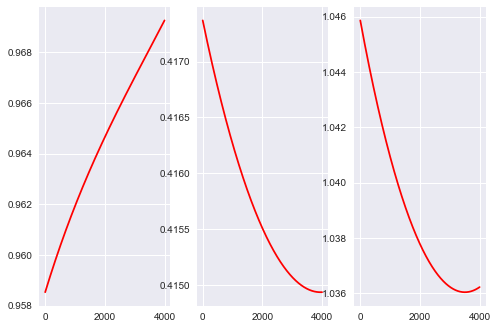

In [69]:
plt.subplot(131)
plt.plot(loss_list, 'r')
plt.subplot(132)
plt.plot(p_mean_list, 'r')
plt.subplot(133)
plt.plot(p_sq_mean_list, 'r')

In [179]:
print p_t.grad.data.mean()

tensor(0., dtype=torch.float64)
